#Regresión Lineal con Machine Learning

La tarea de regresión consiste en encontrar una función que nos permita predecir el valor de una o más variables a partir de una o más características (o features). Un ejemplo sería el de predecir el precio de una casa a partir de su número de habitaciones, metros cuadrados, etc. El modelos de ML más sencillo para este tipo de tarea es el modelo de regresión lineal.

Entrenar un modelo de regresión lineal consiste en encontrar el conjunto de pesos, que minimizen una función de coste determinada. En el caso de la regresión, el error medio cuadrático suele utilizarse comunmente como medida del error.

Vamos a generar un conjunto simple de datos sintéticos:

y = 2x + 3 + *perturbación*

In [ ]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

SEED = 42
TOTAL_SAMPLES = 500
FONT_SIZE = 18

np.random.seed(SEED)

In [ ]:
# Funciones para representar gráficas que van a facilitar el código

def draw_scatter_plot(X, y):
    plt.plot(X, y, "b.")
    plt.xlabel("$x$", fontsize=FONT_SIZE)
    plt.ylabel("$y$", rotation=0, fontsize=FONT_SIZE)
    plt.show()

def draw_prediction(X, y, y_predict):
    plt.plot(X, y_predict, "r.", linewidth=2, label="Predicción")
    plt.plot(X, y, "b.")
    plt.xlabel("$x$", fontsize=FONT_SIZE)
    plt.ylabel("$y$", rotation=0, fontsize=FONT_SIZE)
    plt.legend(loc="upper left", fontsize=FONT_SIZE)
    plt.show()

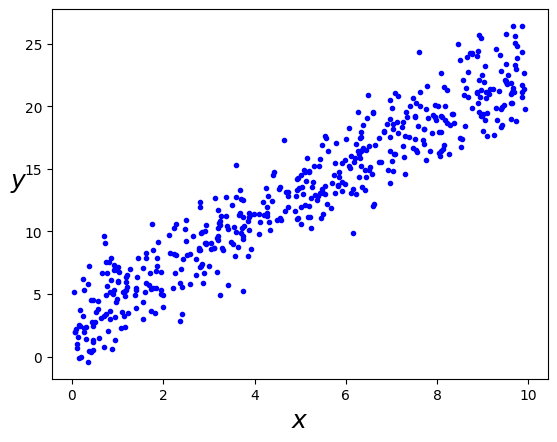

In [ ]:
# Generamos datos sintéticos con una variable objetivo con relación lineal
# y = 2x + 3 + perturbación

X = 10 * np.random.rand(TOTAL_SAMPLES, 1)
y = 2 * X + np.random.normal(3, 2, (TOTAL_SAMPLES, 1))

draw_scatter_plot(X, y)

En este caso tenemos una única característica a partir de la cual queremos predecir una sola variable (por ejemplo el precio de una casa en función de sus metros cuadrados). Podemos usar el modelo de *LinearRegression* de la librería scikit-learn.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f"y = {lin_reg.coef_[0][0]}x + {lin_reg.intercept_[0]}")

y = 2.046000924578289x + 2.7858967069661276


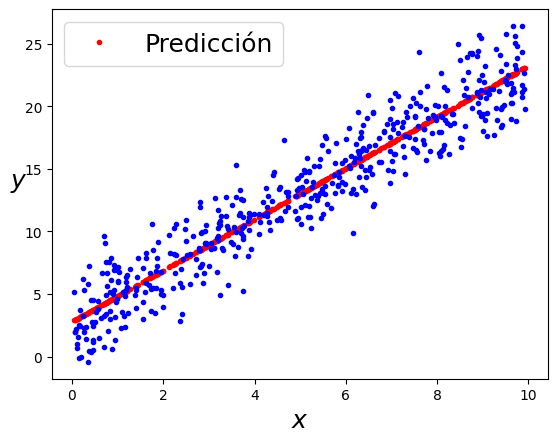

In [ ]:
y_predict = lin_reg.predict(X)
draw_prediction(X, y, y_predict)

Como puedes ver, este método es muy sencillo, eficiente y explicable. Sin embargo, si nuestros datos no siguen una tendencia lineal el resultado que obtendremos no será muy bueno.

## Regresión polinomial

Vamos a generar ahora unos datos sintéticos que no van a tener una tendencia lineal.

y = 0.5x² + x + 2 + *perturbación*

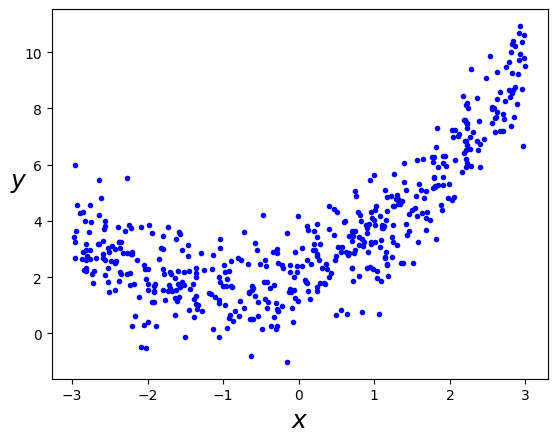

In [ ]:
X = 6 * np.random.rand(TOTAL_SAMPLES, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(TOTAL_SAMPLES, 1)

draw_scatter_plot(X, y)

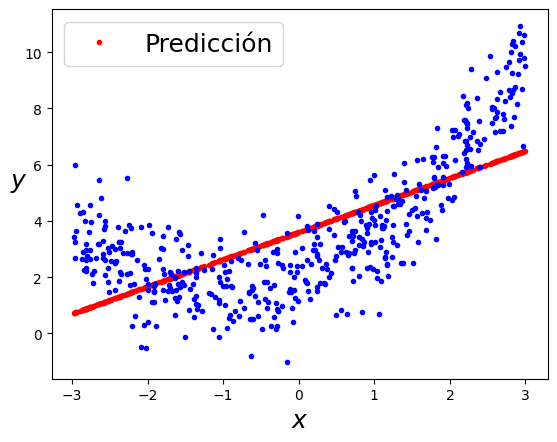

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_predict = lin_reg.predict(X)
draw_prediction(X, y, y_predict)

En el ejemplo anterior, como no hay una relación lineal entre la entrada y la salida se produce infraajuste. Cuando sabemos que esto sucede podemos seguir usando un modelo de regresión lineal añadiendo nuevas características que sean potencias de las características originales.

y = 0.5198375073738635x² + 0.987760698663205 + 2.0233305201982965


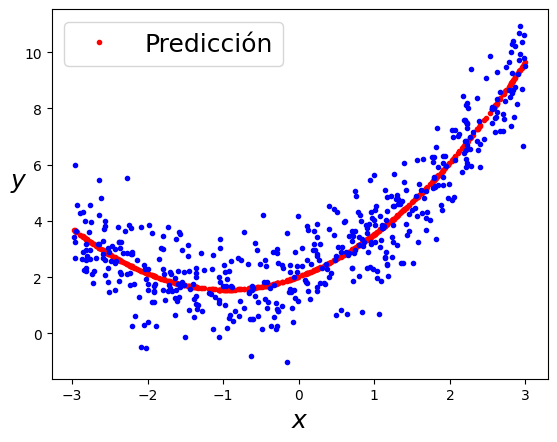

In [ ]:
X = np.hstack((X ** 2, X))  # en la 1ª columna está x², en la 2ª x

lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_predict = lin_reg.predict(X)

lin_reg.coef_, lin_reg.intercept_
print(f"y = {lin_reg.coef_[0][0]}x² + {lin_reg.coef_[0][1]} + {lin_reg.intercept_[0]}")

draw_prediction(X[:,1], y, y_predict)